#05 Clustering Algorithms in Machine Learning 
###  K Means and K Nearest Neighbors Algorithms

Welcome to the fifth session of the Practical Machine Learning sessions, for the Machine Learning course. In this lab session, we will move slightly towards a relatively overlooked domain of Machine Learning - *Unsupervised Learning*. Till Now, and for the most of the part in the future, we will be looking at *Supervised Learning* problems. So, first of all, what is the difference between supervised learning and unsupervised learning?

If I were to tell you the textbook definition of the difference between the two,I would simply tell you, that unsupervised learning requires labels, and supervised learning does require labels. Yes, that is a difference, but in introspection, it is really not a good way to tell the difference between the two. We simply answered the question, "What do these learning methods *require* in order to learn", but not the most important question - *What on earth IS unsupervised learning, or supervised learning, and what is the difference in terms of the approach?*

So, lets spend some time to understand that first. 
All of the supervised training algorithms we saw till now had a very common theme. We had some data. We build a model which takes in inputs, and gives and output (the input and output may not necessarily be different things. For example, in the text generator example, the input itself was the target).

And we try to *optimize* the model such that the prediction outputs and target variables are as close to each other as possible. By this, we intend to build a model that knows how to map those inputs to the real world targets. For example, if you were to build a model that can generate music for you, you provide your model with lots of examples of music peices, and expect the model to learn how to make music, *without explicitly teaching it music theory, or the idea of melody, etc*, and only through example. The idea is - we try to optimize the model with a specific goal in mind that we wish the model performs.

This is not the case for unsupervised learning. We dont build models with a specific goal in mind. The objective is to simply identify whatever patterns are observable in the data. Like, What is the mathematical distribution? How dense is the data? What is the range of the values in the data? How many clusters are observable? Is there a certain visible relation between different types of data?(like, if one increases, does the other increase too?) and so on.

Unsupervised learning is used to identify patterns, whereas supervised learning is used to get specific results from the data. This is the correct method to differentiate between these two!

---

Now, coming to our topic today - *Clustering Algorithms!* We'll be looking at two algorithms -  **K Means** and **K Nearest Neighbors** Algorithms, and we'll explore both separately! So let's get started...

### K Means Algorithm

Take a look at this data below.

<figure><center>
<img src='https://drive.google.com/uc?id=1gFNxPtQhVb8ekxZN4XV6NWZhGHgSwpFy' width='50%'>
<figcaption>The Social Network</figcaption>

</center></figure>

This is a social network graph. It is basically a visualization of who is a connection of whom. For example, if this network belonged to Facebook, the image would depict which people are friends on facebook, and who aren't. People who are friends on facebook have a faint grey line joining their profile images. You might notice that there are some distinct groups in this photo, which appear as blobs. You can see two major such blobs, one on the left and one on the right. These are called *clusters* of data. 

Lets say that people in the left blob are college going kids, and on the right are business professionals. Obviously, college going kids are more likely to know each other than they would know business professionals, and similarly business professionals are more likely to know each other, rather than college going kids, only because of the shared experiences and backgrounds. Hence, you would expect college kids to be friends with each other, far more than you would expect college kids being Facebook friends with business professionals. Hence these two clusters. 

Within each cluster, people are connected to each other via Facebook. Obviously it is not true, that no college kids are connected to any business professionals, and vice versa. But still, there is such a stark lack of such connections, that the graph almost seems like its divided into two major clusters. 

Just by looking at the data, you can tell that there are 2 clusters in the data. You don't even have to know which person goes to college, and which is a business professional. We would like our machines to do that for us - without necessarily having to tell which person belongs to which category. Hence the concept of Unsupervised Learning!

Why would we want to identify clusters? Let's take the example of Facebook itself. Facebook can't recommend the same Ads to everyone. It obviously needs to optimize this. But Facebook knows that if some college goers are interested in a product, say Fidget Spinners (even though that's not a thing anymore!) , others will be too! And they will be much more likely to buy these, than business professionals. So Facebook would recommend Fidget Spinners to college goers rather than business professionals. On the other hand, if Facebook realizes that there is a trend of buying international holiday trip packages, it would rather recommend those to all business professionals, rather than college kids, which are much less likely to afford one! Ofcourse to do all this, Facebook might  not necessarily know the fact that which group is which in profession.

Hope this idea is clear!

In Machine Learning, a great algorithm to carry out unsupervised clustering is the **K Means** Algorithm.

The objective of the K Means Algorithm is to create K different clusters, that are visible separated from each other. The procedure is as follows:

1. create K random data points, called as *centroids*. Each of these centroids will form a separate cluster later on.
2. For each datapoint, find out which centroid is the datapoint closest to. Whichever centroid it is closest too, assign the datapoint the same group as the centroid. So at the end, each datapoint will be assigned a group, containing exacly one centroid.
3. Update the value of centroids as the Mean of all the datapoints that exist in the group.
4. Repeat Steps 2 and 3 until you get desired results. During step 2, the group assigned to a datapoint may change, depending on which centroid it is closest too at this point (after updating the position of centroids).

Imagine what happens during step3. By updating the value of the centroid as the mean of all the datapoints, we are essentially *pulling* the centroid to where there is more density of data. If this process is repeated multiple times, we will eventually pull the centroid to a position where this high density of data, or in other words, a blob/cluster exists. Here is a quick visualization of the K Means algorithm.

<figure><center>
<img src='https://drive.google.com/uc?id=15T7mCRh1AsTwFgFRxvrdXDkHRPcqiREZ' width='50%'>
</center></figure>

In today's session we'll be looking at a very interesting problem - We will be identifying the crime hotspots of a city - meaning, identifying which areas are more prone to crimes and which are safer.



#### Case Study: Crime Hotpots in Vancouver

We have some data about crimes in the city of Vancouver, Canada. The data includes their nature, the time of occurence, the location, etc. Our job is to identify the areas of the city where the crime is more likely to occur. This can help the local Police Department deploy enough personnel, so that they are ready, equipped, and well numbered to tackle crimes. 

This can also help people like us, who would want to find new homes. We would obviously like to buy a house in a safer locality, rather than a crime-prone locality.

So let us first download the [dataset](https://www.kaggle.com/wosaku/crime-in-vancouver) from kaggle. Before that, you need to upload the *kaggle.json* file

In [1]:
#run only once per session
%cd 
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d wosaku/crime-in-vancouver
!mkdir -p vancouver_crime && unzip crime-in-vancouver.zip -d vancouver_crime
%cd vancouver_crime
!ls

/root


Saving kaggle.json to kaggle.json
 65% 7.00M/10.8M [00:00<00:00, 72.7MB/s]
100% 10.8M/10.8M [00:00<00:00, 69.3MB/s]
Archive:  crime-in-vancouver.zip
  inflating: vancouver_crime/crime.csv  
  inflating: vancouver_crime/googletrend.csv  
/root/vancouver_crime
crime.csv  googletrend.csv


As you can see, there is a file called the "crime.csv" in this dataset. So to read csv files, we'll be using the pandas library. We'll also be using the matplotlib library to visualize the locations of crimes in a graph plot. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("crime.csv")

In [4]:
print(len(df))
df.head()

530652


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


So there are 530,652 cases of crimes in this dataset. You can see, the dataset provides us with the coordinates of the crimes, as well as the Lattitudes and Longitudes and the times. They also provide us with the type of crimes. However, a crime is a crime, and we don't necessarily need to know the type of crime while looking for a house, or while the police department deploys personnel in different regions. But still, let us try to see what all crimes happen in Vancouver!





In [5]:
df.TYPE.unique()

array(['Other Theft', 'Break and Enter Residential/Other', 'Mischief',
       'Break and Enter Commercial', 'Offence Against a Person',
       'Theft from Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Theft of Vehicle', 'Homicide', 'Theft of Bicycle'], dtype=object)

Before we start working with this data, let us remove any empty records (for example, a policeman, while recording the crime, might not have filled the coordinates, or might not have thought of it as relevant to the crime). 

In [6]:
df.dropna(inplace=True)

So let us now visualize this dataset. Let us plot on a graph, all the X cordinates and the Y cordinates of the crimes, so we get an idea of where do crimes take place, and how many crimes take place in any locality (a rough idea!). But before that, lets see the actual map of Vancouver!

<figure>
<img src='https://drive.google.com/uc?id=1lEOKrWqTal2n9ZGSll1g8A7K4n6gICpI' width='40%'>
</figure>

This map also shows the Neighborhoods in Vancouver, which is provided to us in the dataset as well. 

Let us now plot all crimes on a graph, and see where in Vancouver are crimes found!

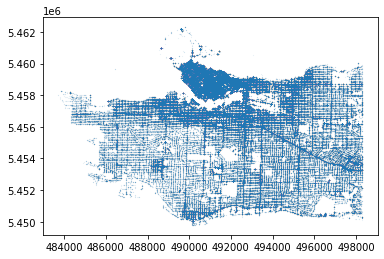

In [7]:
plt.scatter(df.X,df.Y,s=0.001) #s is used to control the size of datapoints on the graphs. There are so many datapoints, that if you use the normal size, all the datapoints will get merged. Hence, use a small 's'

You can see, that there are crimes all over the city. However, you may observe that in some parts, the density of crimes is higher than the rest of the city (For example, in the northern parts of the city)! 

So let us see, which neighborhoods have more crime than others. Below, we plot a colour coded map showing different neighborhoods, as well as a bar graph, showing the number of crimes per neighborhood.

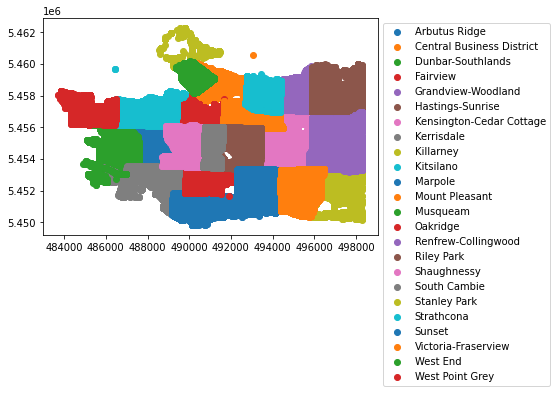

In [8]:
category='NEIGHBOURHOOD'
for name,group in df.groupby(category):
    plt.scatter(group.X,group.Y,label=name)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

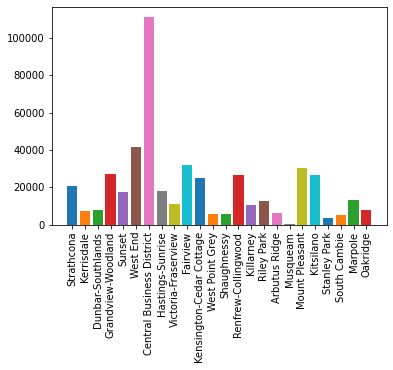

In [9]:
count={i:len(df[df[category]==i]) for i in df[category].unique()} # a dictionary that can help us keep track of which neighborhood has how many crimes
for i in count:
    plt.bar(i,count[i])
plt.xticks(rotation='vertical');

Now that we know the number of cases per neighborhood, Let us jump to our ultimate objective - to differentiate neighborhoods by the number of crimes. We would like to create *3 clusters* - High crime rate neighborhood, Moderate crime rate neighborhood, and Low crime neighborhood. Let us first also plot the number of crimes in a straight line.

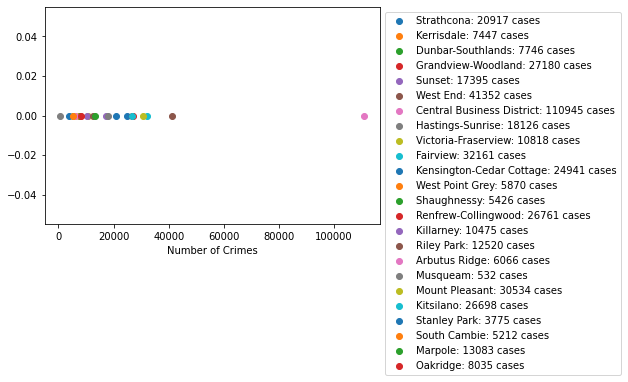

In [10]:
for i in count: plt.scatter(count[i],0,label=f'{i}: {count[i]} cases')
plt.xlabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

You'll notice some things - The Central Business District has more crimes than any Neighborhood, and by a HUGE margin. Obviously that will be clustered as a high crime region. Then come low crime regions and moderate crime regions. We would like our model to automatically detect which district is lower/moderate in crime (based on blobs).

Let us begin by initializing centroids. To do this, we'll be using the NumPy library, which is a numerical processing library in python. It provides us with mathematical tools, which are otherwise computationally and memory wise - intensive. NumPy also provides us with *arrays* which is a concept similar to tensors in PyTorch. However, NumPy arrays are 1-Dimensional only. We'll be using these arrays to do calculations on our data. 

Why numpy arrays and not lists? This is because NumPy arrays and functions are optimized to run at C/C++ speed, which is many orders of magnitude faster than Python itself. This is suitable for large amounts of data, and here we're dealing with hundreds of thousands of datapoints. 

In [11]:
import numpy as np

In [12]:
values=list(count.values())
clusters=['Low','Moderate','High']
colour_scheme={'Low':'green',
               'Moderate': 'orange',
               'High': 'red'}
num_clusters=len(clusters)

In [44]:
#INITIALIZE CENTROIDS
centroids=np.sort(np.random.uniform(low=min(values),high=max(values),size=num_clusters))
centroids #initial centroids. Represent the number of crimes

array([48181.88612286, 57300.5500656 , 76155.67509222])

As we mentioned before, K Means intrinsically doesn't know which cluster belongs to what kind of crime rate. But for better understanding, we will assign the categories of crime rates (Low, moderate and high). So to do that, what we've done is we've made sure that the randomly generated centroids are always in ascending order. These represent ascending order of crime rates. Correspondingly, the labels will automatically become Low Crime Rate, Moderate Crime Rate and High Crime Rate. 

We've also assigned colour codes to these - green being low crime regions, orange for moderate and red for high crime regions. 

Below, we've plotted the crime rates, along with the centroids, marked with crosses. 

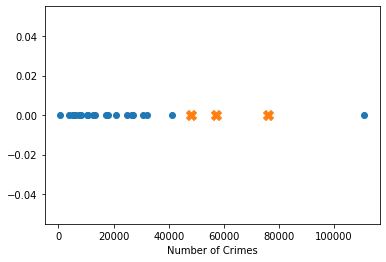

In [45]:
plt.scatter(list(count.values()),[0]*len(count))
plt.scatter(centroids,[0]*num_clusters,marker='X',s=100)
plt.xlabel('Number of Crimes');

We'll make lists corresponding to each of these categories. For example, if a neighborhood's crime frequency is closest to the centroid corresponding to Low Crime rates, we will add the neighborhood to the list corresponding to low crime rates

In [15]:
categories=[[] for _ in range(num_clusters)]
for i in count: categories[np.argmin([abs(count[i]-o) for o in centroids])].append(i)
categories

[['Kerrisdale',
  'Dunbar-Southlands',
  'Victoria-Fraserview',
  'West Point Grey',
  'Shaughnessy',
  'Killarney',
  'Riley Park',
  'Arbutus Ridge',
  'Musqueam',
  'Stanley Park',
  'South Cambie',
  'Marpole',
  'Oakridge'],
 ['Strathcona',
  'Grandview-Woodland',
  'Sunset',
  'Hastings-Sunrise',
  'Kensington-Cedar Cottage',
  'Renfrew-Collingwood',
  'Kitsilano'],
 ['West End', 'Central Business District', 'Fairview', 'Mount Pleasant']]

You can see, there are three lists in the variable `categories`, containing neighborhoods that lie closest to the corresponding centroids (randomly initialized, so the may not make proper sense right now).

So now, We will assign the crime rate category to each datapoint that belongs to a certain category. This way, we can colour code the city, based on the location of the crime.

In [16]:
df['groups']=None
for k,o in enumerate(categories):
    for i in o: df.loc[df['NEIGHBOURHOOD']==i,'groups']=clusters[k]

In [17]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,groups
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Moderate
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Moderate
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Moderate
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Moderate
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Moderate


We've added a  column in the dataframe, called 'groups', which contains the crime rate category, as done by K means algorithm.

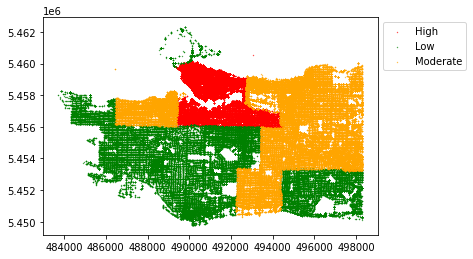

In [18]:
category='groups'
for name,group in df.groupby(category):
    plt.scatter(group.X,group.Y,label=name,c=colour_scheme[name],s=0.1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

You can see, that each region is colour coded as per crime region. Note: you MIGHT be encountering a small problem - you might not be seeing all the categories. You might be seeing less than 3 categories. This is because K Means is *very sensitive to initialization*. Because the initialization is random, it may be possible that some centroids do not lie closest to any datapoints. Each datapoint might be closest to any centroid But a particular centroid. If you're encountering such a problem, go back up, and reinitialize the centroids, and run all the cells of code upto the one just above this peice of text, and repeat this until all three categories are not visible. (Even if you are not encountering this issue, its a fun exercise to see this happen!).



Next Step? Update the centroids as the mean of all datapoints that have been assigned to that cluster.

In [19]:
for k,o in enumerate(categories):
    if o: centroids[k]=np.mean([count[i] for i in o])
centroids

array([ 7461.92307692, 23145.42857143, 53748.        ])

Now all we have to do is repeat this procedure (excluding the random initialization - that needs to be done only once). So Let us write all the peices of code together, and see it work in one go!

Try running the next two cells of code multiple times to see if you get slightly different results each time. This is because of the randomness during initialization. But nevertheless, you will get satisfactory results. 

In [20]:
#Step 1: initialize centroids
centroids=np.sort(np.random.uniform(low=min(values),high=max(values),size=num_clusters))
centroids #initial centroids

array([  1263.45797427,  10099.56365334, 109547.3549902 ])

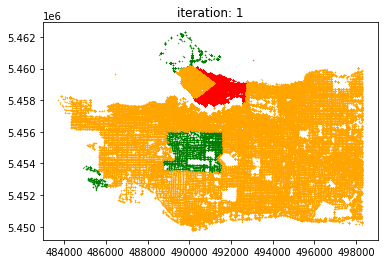

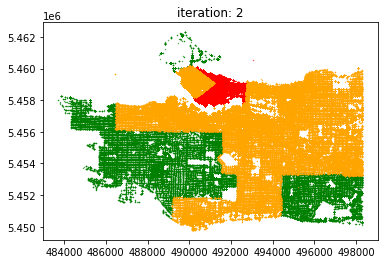

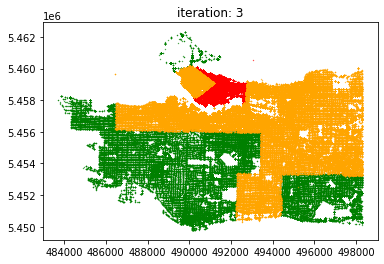

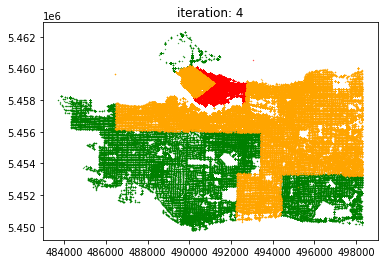

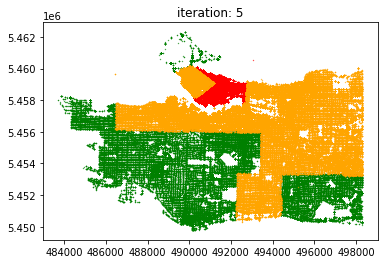

In [21]:
iterations=5 #can be changed
for iteration in range(iterations): #We run this model for 5 iterations
    #Step 2: categorize all points into one or the other groups
    categories=[[] for _ in range(num_clusters)]
    for i in count: categories[np.argmin([abs(count[i]-o) for o in centroids])].append(i)    
    for k,o in enumerate(categories):
        for i in o: df.loc[df['NEIGHBOURHOOD']==i,'groups']=clusters[k]
    #Step 3: update centroids
    for k,o in enumerate(categories):
        if o: centroids[k]=np.mean([count[i] for i in o]) 

    # Visualize
    for name,group in df.groupby(category):
        plt.scatter(group.X,group.Y,label=name,c=colour_scheme[name],s=0.1);
    plt.title(f'iteration: {iteration+1}')
    plt.show()

And there you have it! You have successfully built your own Crime Hotspot Detection system! And using 4 simple steps only - Initialize, Assign, Update, Repeat! Congrats on that!

But there is something we can, and should do. These 4 steps should not so many lines of code. We should *refactor* the code into functions, so that the model becomes easier to run and understand. So we've build a basic structure to help us with all the major steps. 

In [22]:
def initialize_centroids(values,num_clusters):
    centroids=np.sort(np.random.uniform(low=min(values),high=max(values),size=num_clusters))
    return centroids

def count_frequencies_in_df(df,group_by='NEIGHBOURHOOD'):
    df.dropna(inplace=True)
    df.count_freqs={i:len(df[df[group_by]==i]) for i in df[group_by].unique()}

def categorize(df,centroids,clusters,group_by='NEIGHBOURHOOD'):
    num_clusters=len(clusters)
    categories=[[] for _ in range(num_clusters)]
    # for i in df.count_freqs: categories[np.argmin([abs(df.count_freqs[i]-o) for o in centroids])].append(i)  
    for i in df.count_freqs:
        argmin=np.argmin([abs(df.count_freqs[i]-o) for o in centroids])
        categories[argmin].append(i)
    
    df['groups']=None  
    for k,o in enumerate(categories):
        for i in o: df.loc[df[group_by]==i,'groups']=clusters[k]
    return categories

def update_centroids(centroids, categories):
    for k,o in enumerate(categories):
        if o: centroids[k]=np.mean([df.count_freqs[i] for i in o])
    return centroids

def visualize(df, category_column, iteration ):
    for name,group in df.groupby(category_column):
        plt.scatter(group.X,group.Y,label=name,c=colour_scheme[name],s=0.001);
    plt.title(f'iteration: {iteration+1}')
    plt.show()

And let us see an entire Crime Hotspot detection model running in only 7 lines of code! 

PS: Try running the cell below multiple times, to get slightly different results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


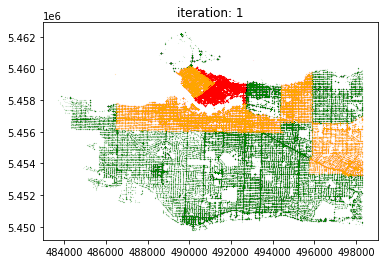

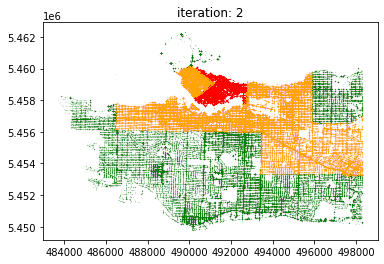

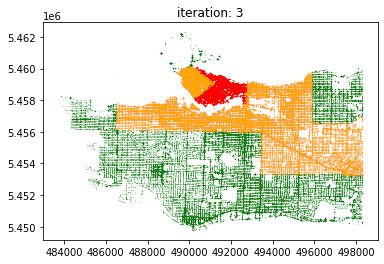

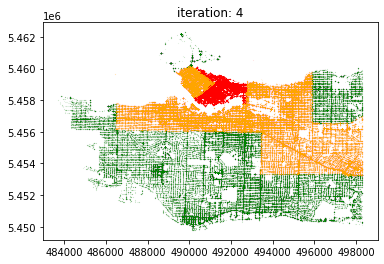

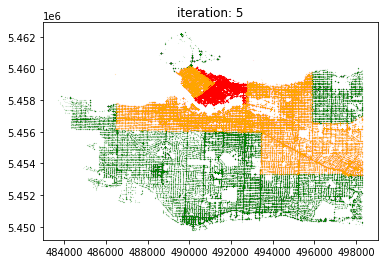

In [23]:
#Entire K means in just 7 lines of code , excluding comments, ofcourse

#step0
group_by='NEIGHBOURHOOD'
count_frequencies_in_df(df,group_by=group_by) #method which creates a data structure based on which distinction is to be done
# step1
centroids=initialize_centroids(values, num_clusters)
for i in range(5):
    #step2
    categories = categorize(df,centroids,clusters,group_by=group_by)
    # step3
    centroids = update_centroids(centroids,categories)
    visualize(df,'groups',iteration=i)
    #repeat step 2 through 3

Just for comparison, here is the map of all crimes. Try noticing if high density regions have been correctly marked as red, and if low density regions correcly as green? What about orange?

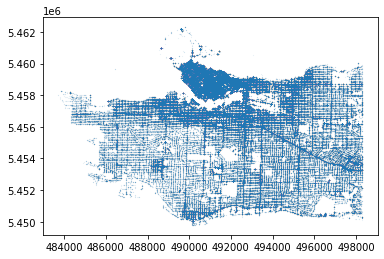

In [24]:
plt.scatter(df.X,df.Y,s=0.001)

Now, let us move onto the second algorithm that we'll look at today - the **K Nearest Neighbors** algorithm.

### K Nearest Neighbors
K nearest Neighbors is a very simple algorithm. You are given some data. Now, suppose when you get some new data point, and you wish to either classify or predict a value, you simply look at its neighbors. 

1. If you want to classify a datapoint into a category, look at K nearest datapoints. Whichever category occurs the most, is most likely to be the class of the datapoint as well.

2. If you want to conduct regression, look at the values of K nearest datapoints. You can take the average of the taget values of these datapoints, and it will be a likely estimate of the target value of your datapoint as well.

The idea is simply as follows - "*Birds of a feather flock together...*".

This is technically a supervised learning problem, but still is closer to unsupervised learning than other supervised learning algorithms. There is no learning of parameters, only observing the position of other datapoints relative to the input data point.

So previously we tried to cluster neighborhoods based on the number of crimes per neighborhood. Now we will try to classify each locality with respect to the most common crime in that area. We will analyse K nearest Neighbors and figure out which crime is the most common. Ofcourse, that is the most likely crime to happen at that particular location. 

Let us begin with some random coordinates and visualize it on the map!

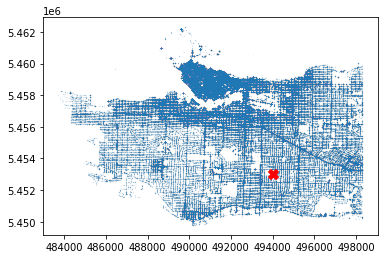

In [25]:
coordinates=(494000,5453000)
plt.scatter(df.X,df.Y,s=0.001)
plt.scatter(*coordinates,c='RED',marker='X',s=100)

In [26]:
x,y=coordinates

The next step is to calculate the *Distance* of this coordinate from other datapoints. This will be used to find the the nearest neighbors! But we won't write a for loop - that is awfully slow. Infact, we will use function that NumPy provides, which run at C/C++ speed. For 2D cordinates, the distance is defined as the euclidean distance between the two, given by - 

$distance((x_1,y_1), (x_2,y_2)) = \sqrt{(x_1 - x_2)^2 + (y_1 -y_2)^2}$

We write all these distances in a new column of the dataframe - the 'Distance column'.

In [27]:
df['Distance']=np.sqrt(np.square(x-df.X) + np.square(y-df.Y))

Now, we need to find nearest neighbors. To do that, we will simply sort the dataframe with respect to the distances, and simply choose the top K rows. 

In [28]:
df.sort_values('Distance',inplace=True)

You can see that the rows are arranged in the ascending order of the distances.

In [29]:
df.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,groups,Distance
275046,Theft from Vehicle,2009,6,10,20.0,30.0,59XX ROSS ST,Sunset,493987.37,5453031.69,49.230037,-123.082585,Low,34.114117
172176,Theft from Vehicle,2006,8,21,19.0,0.0,60XX ROSS ST,Sunset,493986.77,5452963.37,49.229422,-123.082593,Low,38.945986
251985,Theft of Vehicle,2008,12,15,14.0,30.0,60XX ROSS ST,Sunset,493986.77,5452963.37,49.229422,-123.082593,Low,38.945986
195961,Theft from Vehicle,2007,7,15,21.0,30.0,60XX ROSS ST,Sunset,493986.66,5452950.45,49.229306,-123.082594,Low,51.314307
333409,Mischief,2011,4,14,6.0,30.0,59XX ROSS ST,Sunset,493987.58,5453055.70,49.230253,-123.082583,Low,57.067910
518462,Theft of Bicycle,2017,6,30,9.0,30.0,60XX ROSS ST,Sunset,493986.56,5452939.41,49.229207,-123.082595,Low,62.062724
309890,Break and Enter Residential/Other,2010,9,23,17.0,0.0,60XX ROSS ST,Sunset,493986.54,5452937.52,49.229190,-123.082595,Low,63.913395
309892,Break and Enter Residential/Other,2010,10,17,16.0,0.0,60XX ROSS ST,Sunset,493986.54,5452937.52,49.229190,-123.082595,Low,63.913395
260758,Mischief,2009,8,27,18.0,26.0,59XX ROSS ST,Sunset,493978.54,5453066.86,49.230353,-123.082707,Low,70.219593
150513,Mischief,2006,2,21,22.0,19.0,59XX ROSS ST,Sunset,493978.54,5453066.86,49.230353,-123.082707,Low,70.219593


Choose a K. There is no definite method to choose K. But for this case, we'll choose K as 1000. Meaning, we'll be analysing the most probable crime on a given pair of coordinates, based on 1000 surrounding points. Whichever crime occurs in majority in these 1000 points, is the most likely crime in that location as well.

In [30]:
k=1000

Finally, let us carry out the prediction, which is simply the crime which occurs most frequently in the K points.

In [31]:
prediction = df[:k].TYPE.value_counts().index[0]
prediction

'Theft from Vehicle'

Hence, we have found the most probable crime on those coordinates. Let us also see, that, out of 1000 datapoints, how many of each crimes occur, and verify that the most frequent crimes is the same as our prediction.

In [32]:
df[:k].TYPE.value_counts()

Theft from Vehicle                                        318
Break and Enter Residential/Other                         230
Mischief                                                  210
Theft of Vehicle                                          145
Vehicle Collision or Pedestrian Struck (with Injury)       69
Theft of Bicycle                                           22
Break and Enter Commercial                                  5
Vehicle Collision or Pedestrian Struck (with Fatality)      1
Name: TYPE, dtype: int64

Let us visualize this! We plot only these K points, and see, the number of crimes in the area, and visually verify that most common crime in the area is the same as our prediction. For better visual aid, we've enlarged the most probable crime with respect to other crimes.

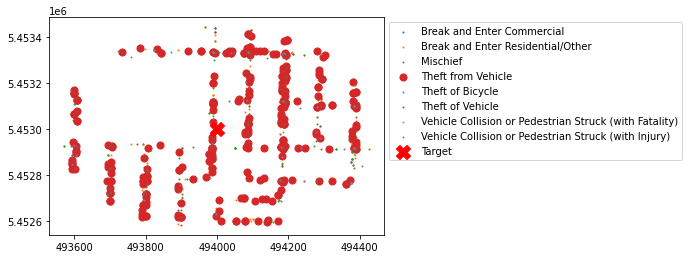

In [33]:
for name,group in df[:k].groupby('TYPE'):
    plt.scatter(group.X,group.Y,label=name,s=50 if name is prediction else 1 )
plt.scatter(x,y,c='RED',marker='X',s=200,label='Target')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

And thats it! You've built your own crime predictor as well! With such less effort, that too!

But again, we've written way too much of code for such simple tasks. We should refactorize the code. Let us write some appropriate functions, carrying out the same tasks. 

In [34]:
def visualize_target(coordinates:tuple, df):
    x,y=coordinates
    assert df.X.min()<=x<=df.X.max(),f'x cordinate should lie in Vancouver City - between cordinates {df.X.min()} and {df.X.max()}.'
    assert df.Y.min()<=y<=df.Y.max(),f'y cordinate should lie in Vancouver City - between cordinates {df.Y.min()} and {df.Y.max()}.'
    plt.scatter(df.X,df.Y,s=0.001)
    plt.scatter(x,y,c='RED',marker='X',s=100)

In [35]:
def euclidean_2d_distance(x,y,df):
    return np.sqrt(np.square(x-df.X) + np.square(y-df.Y))

def get_k_nearest_neighbors(df,target_coordinates,k=1000,distance_func=euclidean_2d_distance):
    df['Distance']=distance_func(*coordinates,df)
    df.sort_values('Distance',inplace=True)
    return df[:k]

def get_prediction(df):
    prediction = df.TYPE.value_counts().index[0]
    return prediction

def visualize_prediction(df,pred=None,k=None):
    if pred is None: pred=get_prediction(df)
    if k is None: k= len(df)
    
    for name,group in df[:k].groupby('TYPE'):
        plt.scatter(group.X,group.Y,label=name,s=50 if name is prediction else 1 )
    plt.scatter(x,y,c='RED',marker='X',s=200,label='Target')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

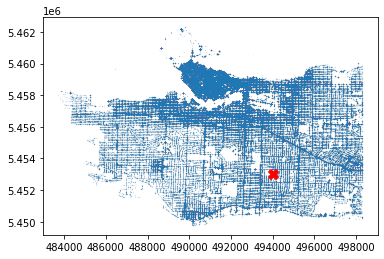

In [36]:
# KNN in 4 lines
visualize_target(coordinates,df) #line1

In [37]:
pred=get_k_nearest_neighbors(df,coordinates) #line2
get_prediction(pred) #line3

'Theft from Vehicle'

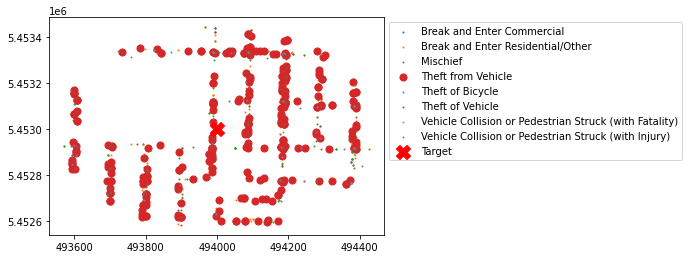

In [38]:
visualize_prediction(df,pred=pred,k=1000) #line4

Try running this algorithm with a different pair of coordinates!

## Review and Tips

In this session, we studied about clustering algorithms in Machine Learning, which is a step towards Unsupervised learning in ML. In both the algorithms above, we did not direct our model towards a specific goal, but did general inference (patter identification) on the data. And still got some really meaningful results. That being said, one should not think that unsupervised leanring is not useful at all. It is very useful in its own applications. 

#### Tips
The only useful tip that you need to learn from this session is - Refactoring code. Most Machine Learning practitioners do not pay attention to this, and this creates a problem for them later on. Why? because if you simply make a good structure of code, you need not rewrite the entire structure if you want your model to perform just slightly differently. As you will see in the exercises below (in the K Means related question), all you need to do is modify one function to solve the biggest problem that K Means algorithms face.

####Questionaire:
These are non-evaluative, but highly recommended to go through. Make sure you clearly know the answer to each of these concepts. The answers to all these questions are somewhere in this notebook, so if you find yourself unclear with a concept, go back up and find the answer!

1. What characteristics of Unsupervised Learning does the KNN algorithm have?
2. What is the advantage of the NumPy library?
3. Similar to the bar graph depicting the number of crimes per district, can you write a piece of code to build a bar graph showing number of crimes per category? (like, Theft from Vehicle and so on).

# Exercises (Evaluative)

## 1. A Robust K Means Algorithmic system
We learnt about the initialization problem in K Means. Many a times, a cluster is not assigned any datapoints. Let us try to solve it. 

All we need to do is, keep re-initializing the centroids, until some or the other datapoint lies closest to it, and the datapoint is assigned that cluster. You need to redefine the `initialize_centroids` function to implement this functionality. 

Then run the model again to see if your function works. (Even After reinitializing multiple times, there should be no empty cluster)!


In [39]:
def initialize_centroids(values,clusters):
    num_clusters=len(clusters)
    centroids=np.sort(np.random.uniform(low=min(values),high=max(values),size=num_clusters))
    categories=[[] for _ in range(num_clusters)]
    categories=categorize(df,centroids,clusters,'NEIGHBOURHOOD')
    while not all(categories): centroids=initialize_centroids(values,clusters)
    return centroids

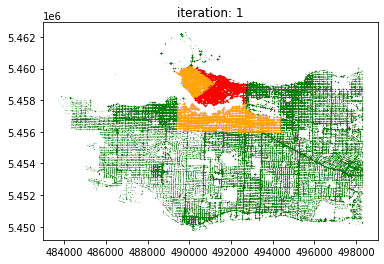

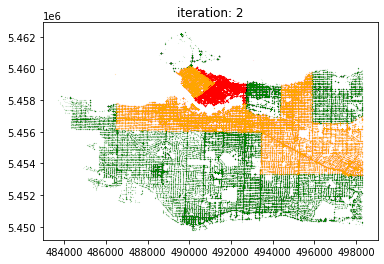

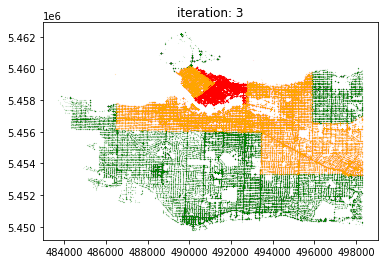

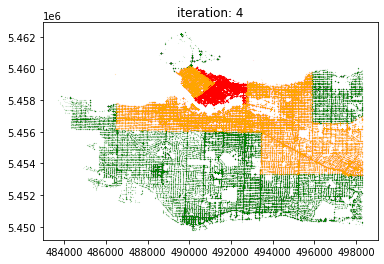

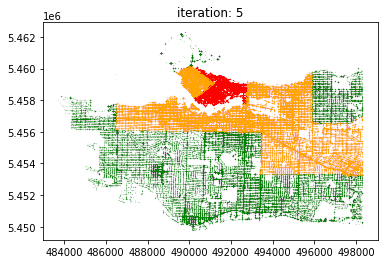

In [40]:
#Entire K means in just 7 lines of code 

#step0
group_by='NEIGHBOURHOOD'
count_frequencies_in_df(df,group_by=group_by) #method which creates a data structure based on which distinction is to be done
# step1
centroids=initialize_centroids(values, clusters)
for i in range(5):
    #step2
    categories = categorize(df,centroids,clusters,group_by=group_by)
    # step3
    centroids = update_centroids(centroids,categories)
    visualize(df,'groups',iteration=i)
    #repeat step 1 through 3

## 2. Regression using K Nearest Neighbors
Just like classification, we'll be carrying out Regression. Instead of finding the majority class, our Job is to find the average of the values of K Nearest Neighbors.

In this exercise, we will be finding out the most probable *Hour* of crime in a particular locality. You can use any cordinates as the reference. Use k as 100.

In [41]:
def get_prediction(df):
    prediction = np.average(df.HOUR)
    return prediction

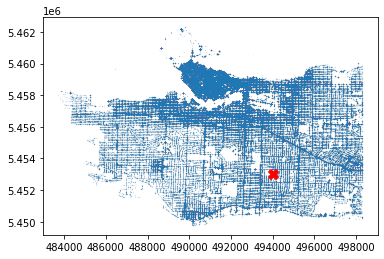

In [42]:
visualize_target(coordinates,df) #line1

In [43]:
pred=get_k_nearest_neighbors(df,coordinates,k=100) #line2
get_prediction(pred) #line3

14.12